In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
from Functions import plot_multiple, residual_analysis
from Functions_New import B20_control, residual_analysis_2
import random

Importing Jupyter notebook from Functions.ipynb
Importing Jupyter notebook from Functions_New.ipynb


### Goal : Build Monotonous Case from Back-to-zero Strategy

In [2]:
# Assume we have a B20 Strain
init_strain1 = B20_control(100,50,-0.10)[1]
init_strain2 = B20_control(100,50,0.10)[1]

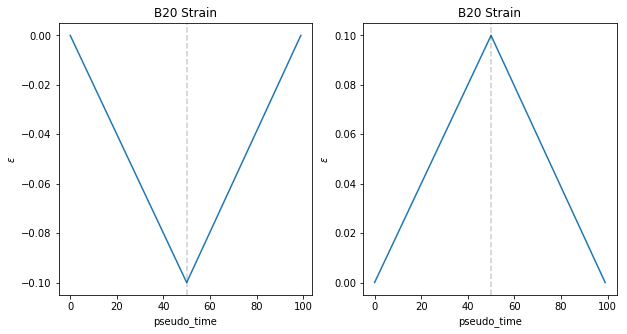

In [3]:
plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1,2,1)
plt.plot(init_strain1)
plt.axvline(50,color='k',ls='--',alpha=0.2)
plt.xlabel('pseudo_time')
plt.ylabel('$\epsilon$')
plt.title('B20 Strain')
plt.subplot(1,2,2)
plt.plot(init_strain2)
plt.axvline(50,color='k',ls='--',alpha=0.2)
plt.xlabel('pseudo_time')
plt.ylabel('$\epsilon$')
plt.title('B20 Strain')
plt.show()

#### The linear case

Let us now build the monotonous corresponding samples from this back to zero strain

In [4]:
def build_linear(b20_strain):
    pos=b20_strain.argmax()
    if pos == 0:
        pos = b20_strain.argmin()
    arr1 = b20_strain[:pos+1]
    final_value = b20_strain[pos]
    num_obs = int(len(b20_strain)/2-1)
    arr2=np.array([final_value]*num_obs)
    lin_case = np.concatenate([arr1,arr2])
    return lin_case

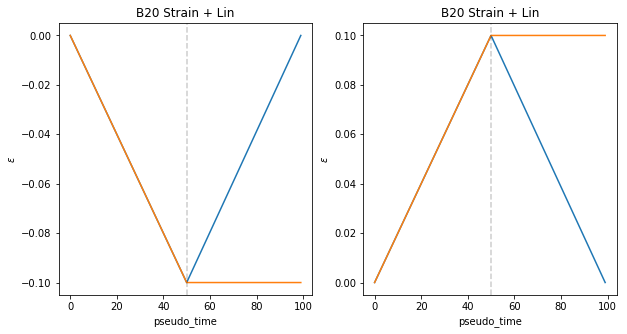

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1,2,1)
plt.plot(init_strain1)
plt.plot(build_linear(init_strain1))
plt.axvline(50,color='k',ls='--',alpha=0.2)
plt.xlabel('pseudo_time')
plt.ylabel('$\epsilon$')
plt.title('B20 Strain + Lin')
plt.subplot(1,2,2)
plt.plot(init_strain2)
plt.plot(build_linear(init_strain2))
plt.axvline(50,color='k',ls='--',alpha=0.2)
plt.xlabel('pseudo_time')
plt.ylabel('$\epsilon$')
plt.title('B20 Strain + Lin')
plt.show()

The idea here is just that once the linear strain reaches its maximal/minimal value it does not move anymore. In other words : $\epsilon = \pm 0.1$ after 50 observations.

#### The monotonous general case

In [6]:
def MS_1(N,peak,p=0):
    if p == 0:
        p = np.random.uniform(1,10)
    key = np.round(p,5)
    return (key, peak*np.array(range(N))**p/(N-1)**p)

def MS_2(N,peak,p=0):
    if p == 0:
        p = np.random.uniform(0.001,1)
    key = np.round(p,5)
    return (key, peak*np.array(range(N))**p/(N-1)**p)

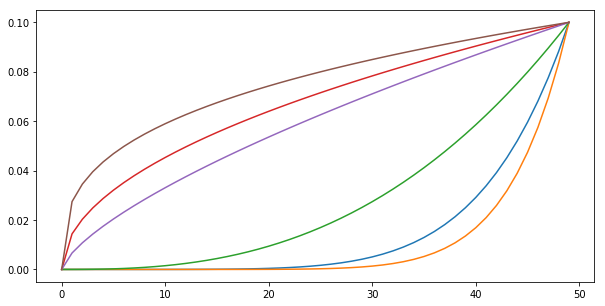

In [7]:
plt.plot(MS_1(50,0.1)[1])
plt.plot(MS_1(50,0.1)[1])
plt.plot(MS_1(50,0.1)[1])
plt.plot(MS_2(50,0.1)[1])
plt.plot(MS_2(50,0.1)[1])
plt.plot(MS_2(50,0.1)[1])
plt.show()

In [8]:
def build_mono(b20_strain):
    max_=True
    pk=int(b20_strain.argmax())
    size=int(len(b20_strain)/2)+1
    if pk == 0:
        pk = b20_strain.argmin()
        max_=False
    arr1=eval('MS_'+str(random.choice([1,2]))+'('+str(size)+','+str(b20_strain[pk])+')[1]')
    arr2=np.array([arr1[-1]]*(size-2))
    return np.concatenate([arr1,arr2])

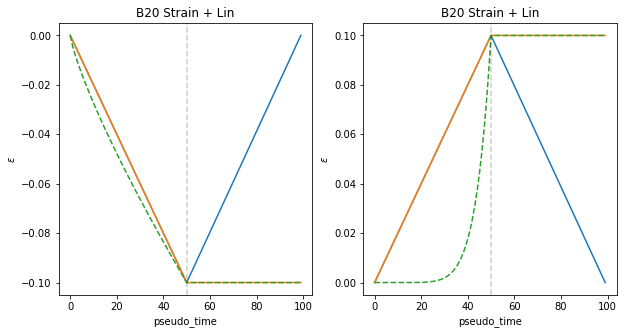

In [9]:
plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1,2,1)
plt.plot(init_strain1)
plt.plot(build_linear(init_strain1))
plt.plot(build_mono(init_strain1),ls='--')
plt.axvline(50,color='k',ls='--',alpha=0.2)
plt.xlabel('pseudo_time')
plt.ylabel('$\epsilon$')
plt.title('B20 Strain + Lin')
plt.subplot(1,2,2)
plt.plot(init_strain2)
plt.plot(build_linear(init_strain2))
plt.plot(build_mono(init_strain2),ls='--')
plt.axvline(50,color='k',ls='--',alpha=0.2)
plt.xlabel('pseudo_time')
plt.ylabel('$\epsilon$')
plt.title('B20 Strain + Lin')
plt.show()

In [14]:
def generator_monotonous(b20_strain):
    pk=int(b20_strain.argmax())
    size=int(len(b20_strain)/2)+1
    if pk == 0:
        pk = b20_strain.argmin()
    strains_=[]
    final_=[]
    arr2=np.array([b20_strain[pk]]*(size-2))
    for i in range(3):
        strains_.append(MS_1(size,b20_strain[pk])[1])
    for i in range(3):
        strains_.append(MS_2(size,b20_strain[pk])[1])
    for el in strains_:
        final_.append(np.concatenate([el,arr2]))
    return final_

In [23]:
plot_test=generator_monotonous(init_strain2)

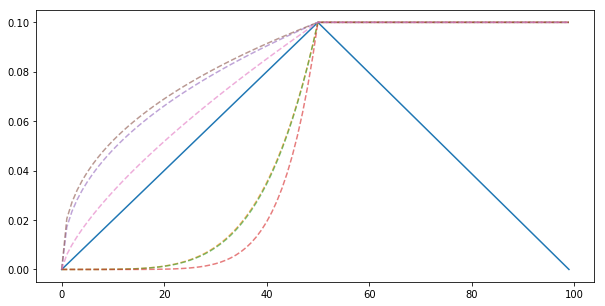

In [25]:
plt.plot(init_strain2)
for el in plot_test:
    plt.plot(el,ls='--',alpha=0.6)

### Results with a dataset of the previous kind

In [2]:
import tensorflow as tf

In [5]:
saver = tf.train.Saver()

In [6]:
with tf.Session() as sess:
    saver.restore(sess, "./tmp3/model-500")
    sess.run(test_init,feed_dict={batch_size:2400})
    try:
        while True:
            strain_test,stress_test,stress_pred = sess.run([strain,stress,output_final])
    except tf.errors.OutOfRangeError:
        pass

INFO:tensorflow:Restoring parameters from ./tmp3/model-500


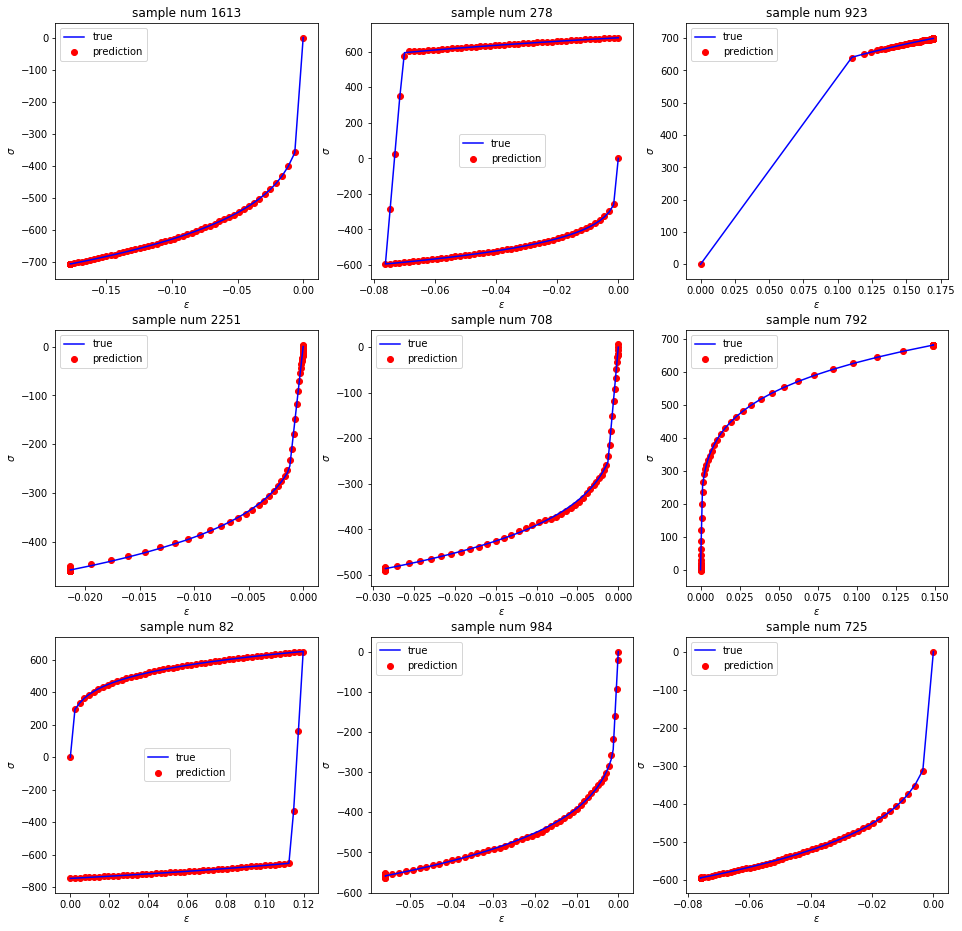

In [7]:
plot_multiple(strain_test,stress_test,stress_pred)

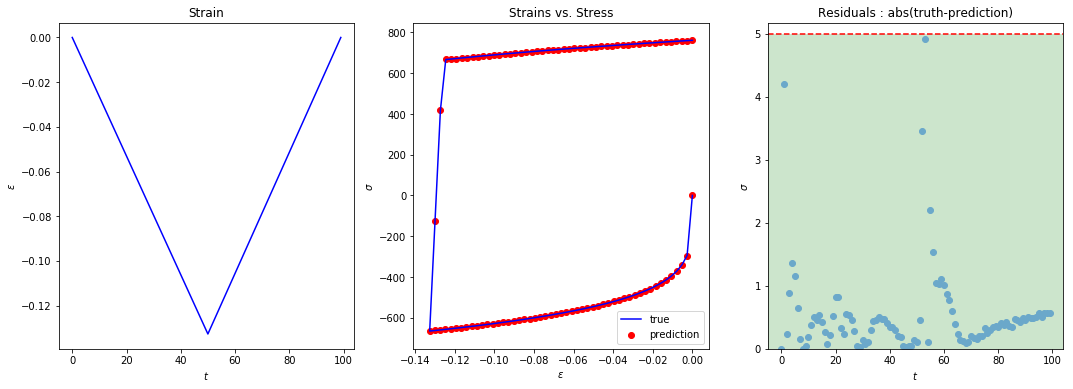

In [8]:
residual_analysis_2(strain_test,stress_test,stress_pred,11)

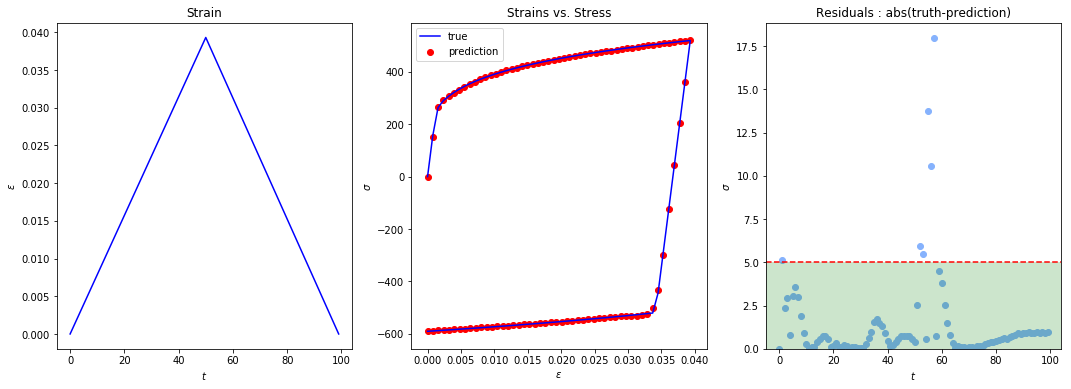

In [13]:
residual_analysis_2(strain_test,stress_test,stress_pred,13)

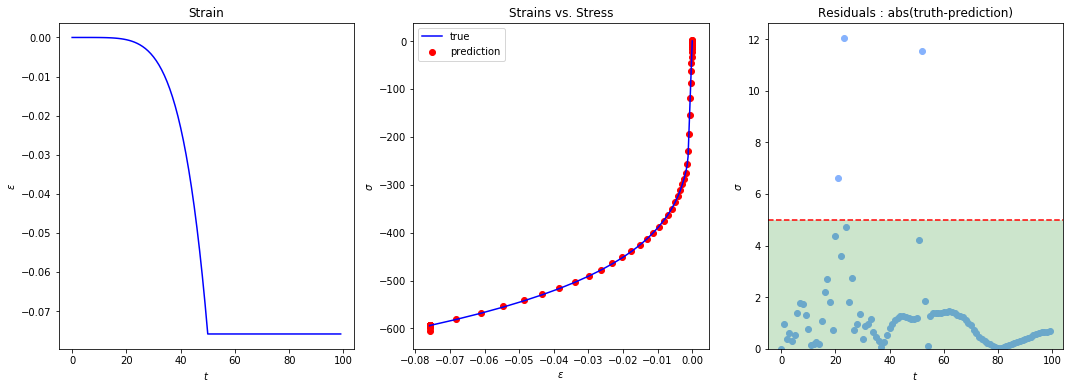

In [9]:
residual_analysis_2(strain_test,stress_test,stress_pred,2256)

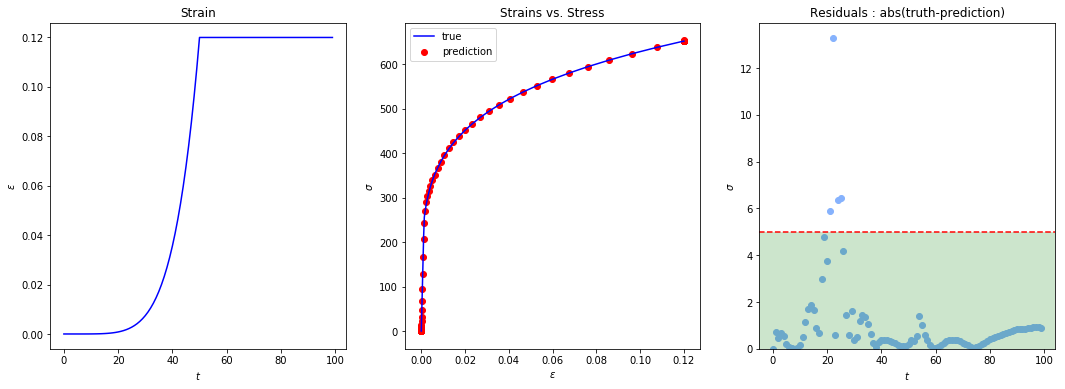

In [10]:
residual_analysis_2(strain_test,stress_test,stress_pred,1789)

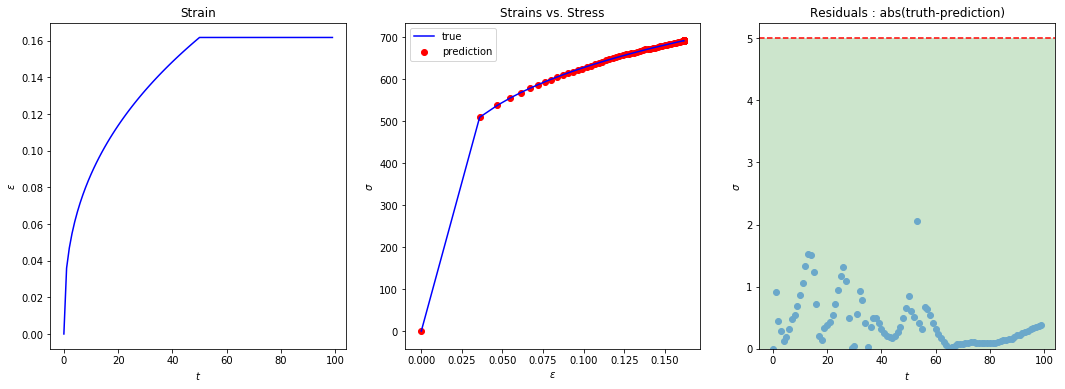

In [11]:
residual_analysis_2(strain_test,stress_test,stress_pred,1450)